In [6]:
#ensuring downloads work
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import string

# Dowling Nltk data just to ensure
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

print("All libraries are imported and NLTK data has been downloaded.")

All libraries are imported and NLTK data has been downloaded.


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/divyaneopaney/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/divyaneopaney/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/divyaneopaney/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [28]:
#Doing this again as I forgot one step for TextBlob
import ssl, nltk

# (Keep the SSL bypass)
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Downloading everything TextBlob/NLTK might need
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')  #new
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/divyaneopaney/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/divyaneopaney/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/divyaneopaney/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/divyaneopaney/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/divyaneopaney/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/divyaneopaney/nltk_data...
[nltk_data]   Package wordnet is already up-to-date

True

In [8]:
# Loading the 20th centurytext file
with open('key_events_20th_century.txt', 'r', encoding='utf-8') as f:
    text = f.read()

print(text[:50])  # preview first 50 characters



Key events of the 20th century - Wikipedia








In [10]:
# Running one extra download to before tokenizing
import nltk

# This handles SSL too:
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')
nltk.download('punkt_tab')    #new 
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/divyaneopaney/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/divyaneopaney/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/divyaneopaney/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/divyaneopaney/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [19]:
from nltk.tokenize import word_tokenize

tokens = word_tokenize(text.lower())

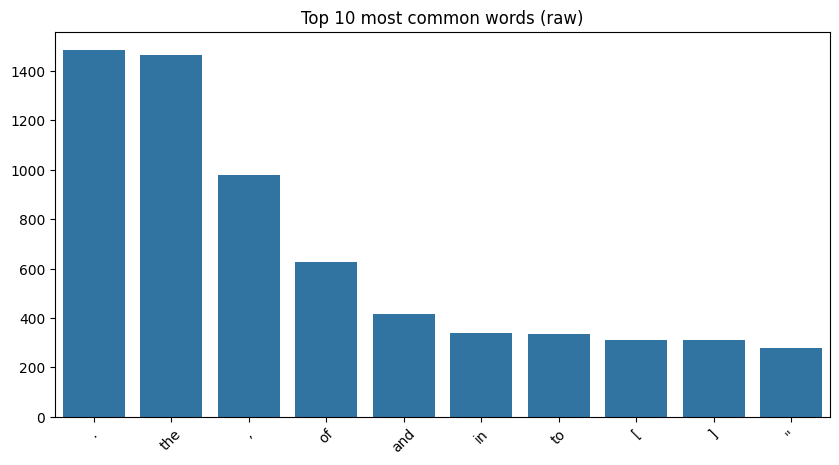

In [12]:
# Counting frequencies (including punctuation for now)
freq_dist = nltk.FreqDist(tokens)
top10 = freq_dist.most_common(10)

# Plot
words, counts = zip(*top10)
plt.figure(figsize=(10,5))
sns.barplot(x=list(words), y=list(counts))
plt.title("Top 10 most common words (raw)")
plt.xticks(rotation=45)
plt.show()

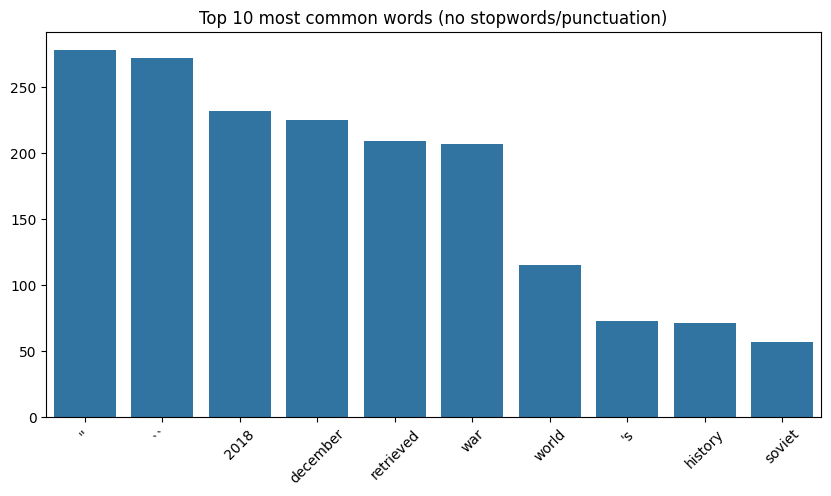

In [13]:
#Removing stopwords + punctuation and re-plotting
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

clean_tokens = [w for w in tokens if w not in stop_words and w not in punctuation]

clean_freq = nltk.FreqDist(clean_tokens)
top10_clean = clean_freq.most_common(10)

words, counts = zip(*top10_clean)
plt.figure(figsize=(10,5))
sns.barplot(x=list(words), y=list(counts))
plt.title("Top 10 most common words (no stopwords/punctuation)")
plt.xticks(rotation=45)
plt.show()

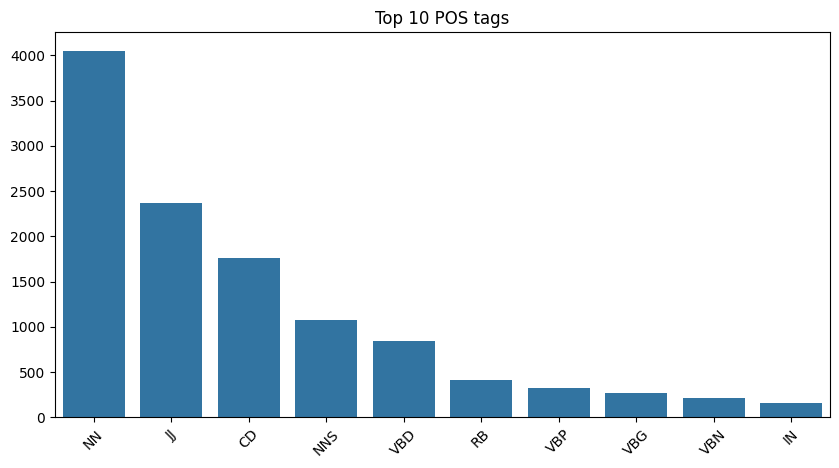

In [20]:
#Top 15 POS lables
blob = TextBlob(' '.join(clean_tokens))
tags = blob.tags  # list of (word, POS) tuples

from collections import Counter
pos_counts = Counter(tag for word, tag in tags)
top10_pos = pos_counts.most_common(10)

pos_labels, counts = zip(*top10_pos)
plt.figure(figsize=(10,5))
sns.barplot(x=list(pos_labels), y=list(counts))
plt.title("Top 10 POS tags")
plt.xticks(rotation=45)
plt.show()

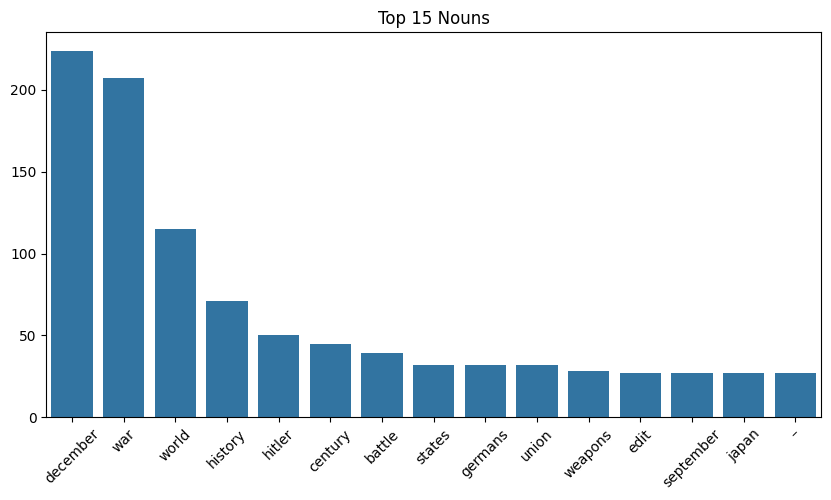

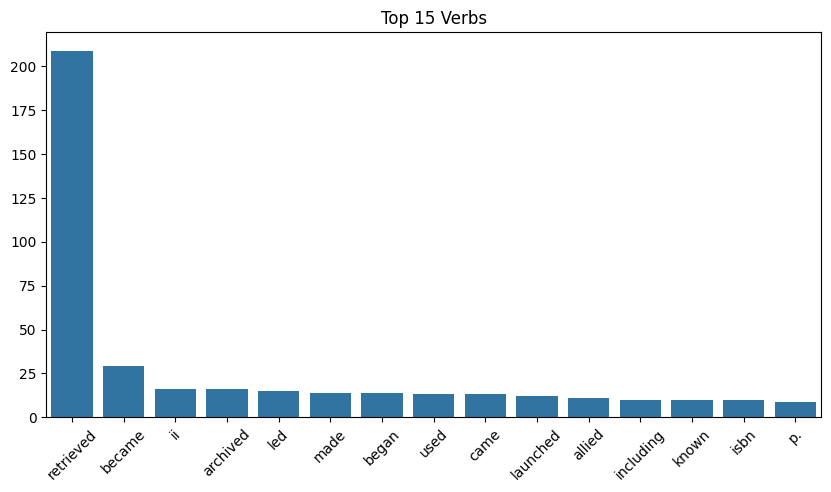

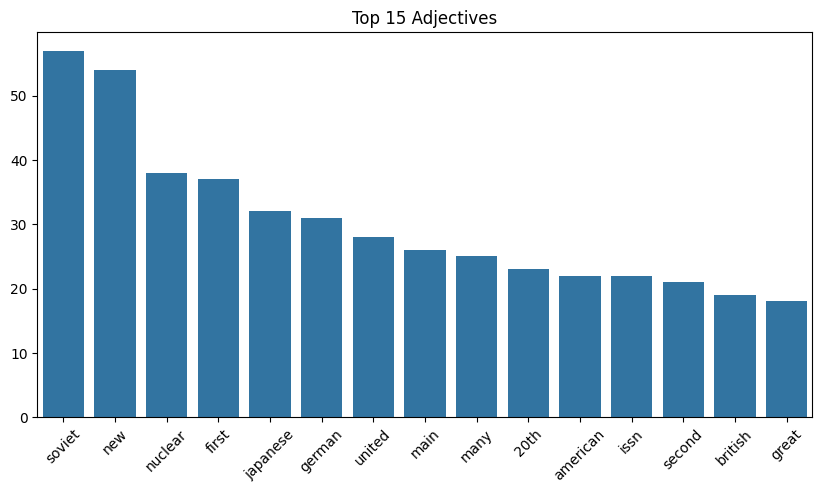

In [21]:
#Separating nouns, verbs, adjectives and plotting top 15 of each
nouns = [word for word, tag in tags if tag.startswith('NN')]
verbs = [word for word, tag in tags if tag.startswith('VB')]
adjectives = [word for word, tag in tags if tag.startswith('JJ')]

def plot_top15(words, title):
    freq = nltk.FreqDist(words)
    top15 = freq.most_common(15)
    if top15:
        w,c = zip(*top15)
        plt.figure(figsize=(10,5))
        sns.barplot(x=list(w), y=list(c))
        plt.title(title)
        plt.xticks(rotation=45)
        plt.show()

plot_top15(nouns, "Top 15 Nouns")
plot_top15(verbs, "Top 15 Verbs")
plot_top15(adjectives, "Top 15 Adjectives")

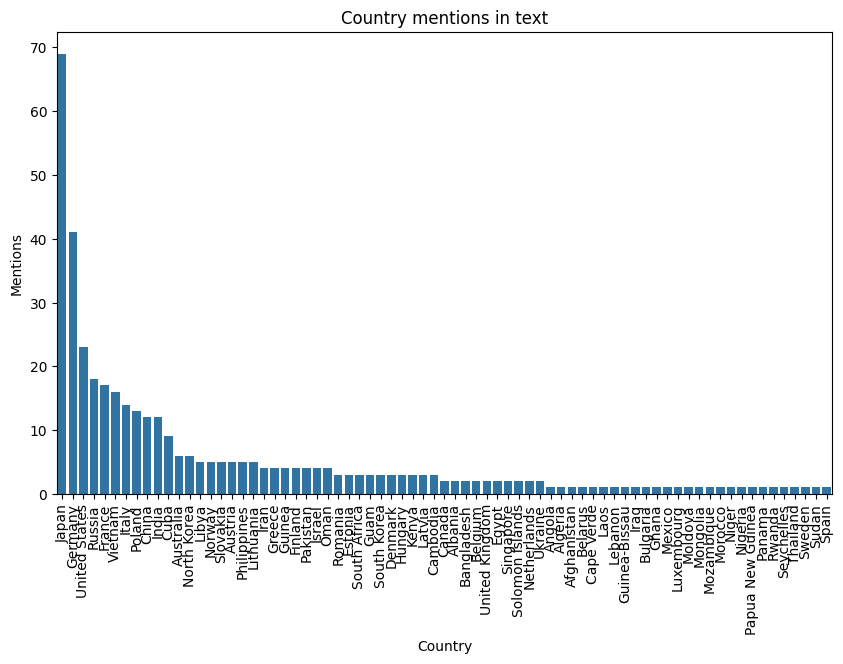

In [23]:
#Counting and ploting countries mentioned
from country_list import countries_for_language

countries = [name for code, name in countries_for_language('en')]
country_mentions = {c: text.lower().count(c.lower()) for c in countries}

country_df = pd.DataFrame(country_mentions.items(), columns=['Country','Mentions'])
country_df = country_df[country_df['Mentions']>0].sort_values('Mentions', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Country', y='Mentions', data=country_df)
plt.xticks(rotation=90)
plt.title("Country mentions in text")
plt.show()

In [24]:
#Counting the frequency of the countries mentioned
from collections import Counter

# Joining tokens back into text for phrase matching
text = ' '.join(clean_tokens).lower()

country_counts = {}
for country in countries:
    # counting occurrences (case-insensitive)
    country_counts[country] = text.count(country.lower())

country_counts = {k: v for k, v in country_counts.items() if v > 0}  # dropping zeros,›

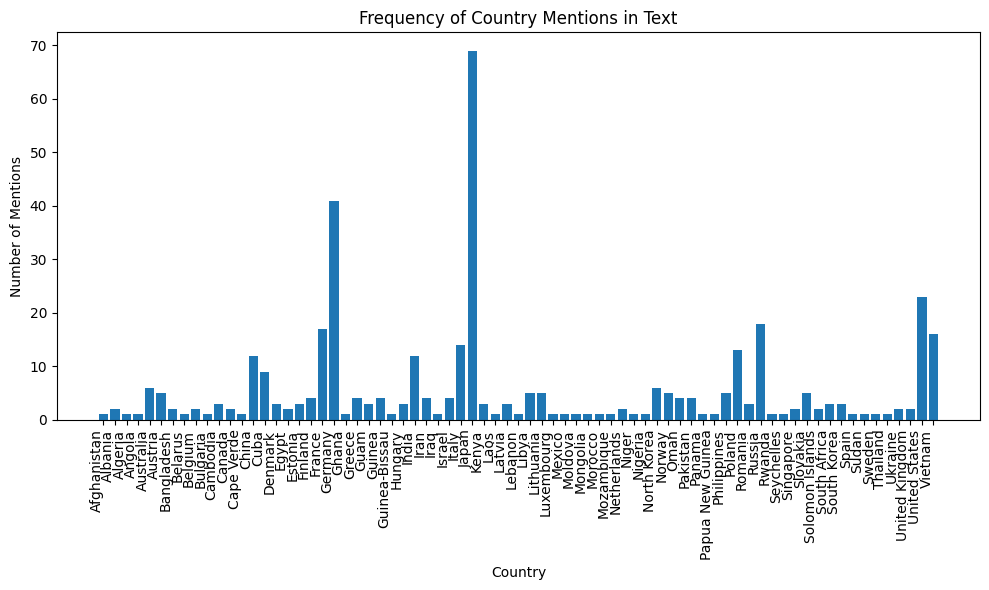

In [27]:
#Plotting the frequency finding
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(country_counts.keys(), country_counts.values())
plt.xticks(rotation=90, ha='right')
plt.title('Frequency of Country Mentions in Text')
plt.xlabel('Country')
plt.ylabel('Number of Mentions')
plt.tight_layout()
plt.show()